In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from load_utils import *
from analysis_utils import *
from collections import OrderedDict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load and Group Data

In [2]:
d = load_diffs()
df_events, df_blocked_user_text = load_block_events_and_users()

In [36]:
d['2015']['pred_recipient'] = (d['2015']['pred_recipient_score'] > 0.7)

In [37]:
agg_dict = {'pred_recipient': ['count','sum'], 'user_id': 'first', 'author_anon': 'first', 'pred_recipient_score': 'mean'}
agg_dict = OrderedDict(agg_dict.items())
df_a = d['2015'].groupby('user_text', as_index = False).agg(agg_dict)

In [39]:
df_a.columns = ['user_text', 'avg_attack_score', 'author_anon', 'user_id', 'total', 'attacks']

In [41]:
df_a['frac_attacks'] = df_a['attacks']/df_a['total']

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [43]:
y = df_a['avg_attack_score']
X = df_a['frac_attacks']

### Distribution of Attacking Comments

In [46]:
bins = [1,2,6,101,10000]
values, base = np.histogram(df_a[['total']], weights = df_a[['attacks']], bins = bins)
width = 0.7 * (base[1] - base[0])
center = (base[:-1] + base[1:]) / 2

In [47]:
print(values)
frac_values = 100.0*values/np.sum(values)
print(frac_values)
y_range = range(len(values))
y_labels = ['1', '2 - 5', '6 - 100', '100+']
# Make the damn non cumulative plot

[ 908.  975.  660.  284.]
[ 32.11885391  34.48885745  23.3463035   10.04598514]


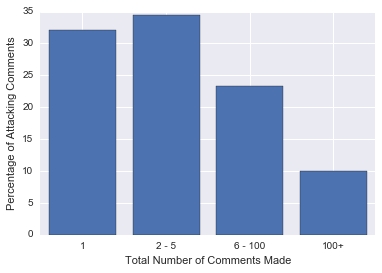

In [48]:
plt.bar(y_range, frac_values, align = 'center')
plt.xticks(y_range, y_labels)
plt.ylabel('Percentage of Attacking Comments')
plt.xlabel('Total Number of Comments Made')

### Split by Anonymity

In [49]:
df_anon = df_a.query('author_anon')
df_registered = df_a.query('not author_anon')

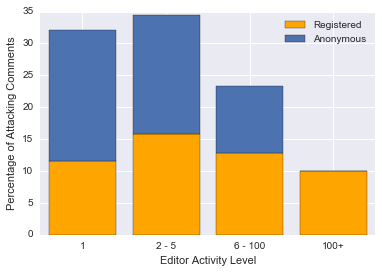

In [55]:
total_values = np.sum(reg_values) + np.sum(anon_values)
frac_reg = 100.0*reg_values/total_values
frac_anon = 100.0*anon_values/total_values
p_reg = plt.bar(y_range, frac_reg, align = 'center', color = 'orange')
p_anon = plt.bar(y_range, frac_anon, align = 'center', bottom=frac_reg)
plt.xticks(y_range, y_labels)
plt.ylabel('Percentage of Attacking Comments')
plt.xlabel('Editor Activity Level')
plt.legend((p_reg[0],p_anon[0]),('Registered','Anonymous'))

### Distribution of All Comments

In [57]:
bins = [1,2,6,101,10000]
values, base = np.histogram(df_a[['total']], weights = df_a[['total']], bins = bins)

In [58]:
values

array([ 140987,  161539,  453716, 1267317])

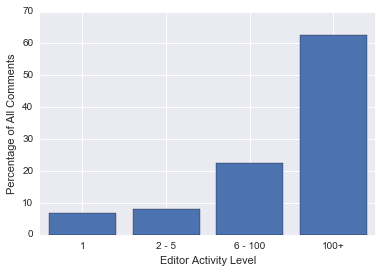

In [59]:
frac_values = 100.0*values/np.sum(values)
y_range = range(len(values))
y_labels = ['1', '2 - 5', '6 - 100', '100+']
plt.bar(y_range, frac_values, align = 'center')
plt.xticks(y_range, y_labels)
plt.ylabel('Percentage of All Comments')
plt.xlabel('Editor Activity Level')

In [60]:
frac_values

array([  6.96727894,   7.98291525,  22.42168378,  62.62812204])